In [75]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets,transforms
from torch.utils.data import DataLoader

参数

准备数据集

In [76]:
    input_size = 784
    # 28x28 flattened pixels
    # hidden_size = 256
    # hidden_size = 128
    hidden_size = 512
    # Neurons in hidden layer
    num_classes =10
    # 10 clothing categories
    num_epochs =20
    # Training cycles
    batch_size =64
    # Samples per batch

In [77]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
    ])
train_dataset = datasets.FashionMNIST(
    root='./data',
    train=True,download=True,transform=transform
)
test_dataset = datasets.FashionMNIST(
    root='./data',
    train=False,transform=transform
)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [83]:
# class NeuralNet(nn.Module):
#     learning_rate =0.001
#     def __init__(self, input_size, hidden_size, num_classes):
#         super(NeuralNet, self).__init__()
#         self.fc1 = nn.Linear(input_size, hidden_size)
#         # self.relu = nn.ReLU()
#         # self.relu = nn.Sigmoid()
#         self.relu = nn.LeakyReLU()
#         self.fc2 = nn.Linear(hidden_size, num_classes)
#
#     def forward(self, out):
#         out = out.view(-1, 28*28)
#         out = self.fc1(out)
#         out = self.relu(out)
#         out = self.fc2(out)
#         return out
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# # 初始化模型、损失函数和优化器
# model = NeuralNet(input_size, hidden_size, num_classes).to(device)
# criterion = nn.CrossEntropyLoss()                       # 损失函数
# learning_rate =0.001
# # optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # 优化器
# optimizer = optim.SGD(model.parameters(), lr=learning_rate)  # 优化器

import torch.nn.functional as F

class NeuralNet(nn.Module):
    learning_rate = 0.001
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size // 2)
        self.bn2 = nn.BatchNorm1d(hidden_size // 2)
        self.fc3 = nn.Linear(hidden_size // 2, num_classes)
        self.relu = nn.LeakyReLU()
        self.dropout = nn.Dropout(p=0.3)

    def forward(self, out):
        out = out.view(-1, 28*28)
        out = self.fc1(out)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.dropout(out)

        out = self.fc2(out)
        out = self.bn2(out)
        out = self.relu(out)
        out = self.dropout(out)

        out = self.fc3(out)
        return out

# 初始化模型、损失函数和优化器
model = NeuralNet(input_size, hidden_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()

# 优化器建议尝试 Adam 和 SGD+Momentum 都试一遍：
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# 或者：optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
print(model)



NeuralNet(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (bn2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
  (relu): LeakyReLU(negative_slope=0.01)
  (dropout): Dropout(p=0.3, inplace=False)
)


In [79]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 假设你已经定义好了：
# - model
# - train_loader, test_loader
# - criterion（如 CrossEntropyLoss）
# - device（如 cuda or cpu）

# 记录损失
train_losses = []
val_losses = []

num_epochs = 10  # 或者 20，用于测试是否过拟合

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # 验证集上的损失
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for val_images, val_labels in test_loader:
            val_images, val_labels = val_images.to(device), val_labels.to(device)
            val_outputs = model(val_images)
            val_loss += criterion(val_outputs, val_labels).item()

    avg_val_loss = val_loss / len(test_loader)
    val_losses.append(avg_val_loss)

    print(f"Epoch [{epoch + 1}/{num_epochs}], "
          f"Train Loss: {avg_train_loss:.4f}, "
          f"Val Loss: {avg_val_loss:.4f}")

    import time

Epoch [1/10], Train Loss: 0.4853, Val Loss: 0.3951
Epoch [2/10], Train Loss: 0.3825, Val Loss: 0.3523
Epoch [3/10], Train Loss: 0.3465, Val Loss: 0.3452
Epoch [4/10], Train Loss: 0.3278, Val Loss: 0.3324
Epoch [5/10], Train Loss: 0.3096, Val Loss: 0.3209
Epoch [6/10], Train Loss: 0.2947, Val Loss: 0.3285
Epoch [7/10], Train Loss: 0.2847, Val Loss: 0.3098
Epoch [8/10], Train Loss: 0.2719, Val Loss: 0.3187
Epoch [9/10], Train Loss: 0.2644, Val Loss: 0.3113
Epoch [10/10], Train Loss: 0.2549, Val Loss: 0.3018


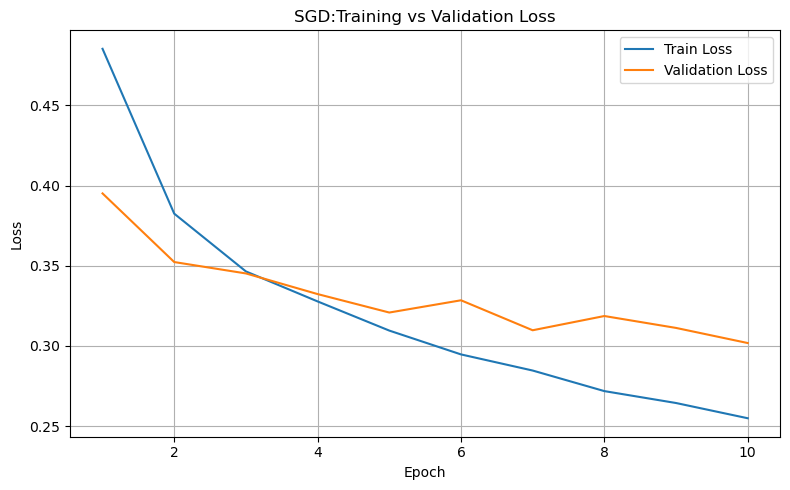

In [80]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('SGD:Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [81]:
# 设置模型为评估模式
model.eval()

# 禁用梯度计算
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)  # 获取最大概率对应的类别
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Test Accuracy: {100 * correct / total:.2f}%')


Test Accuracy: 89.55%


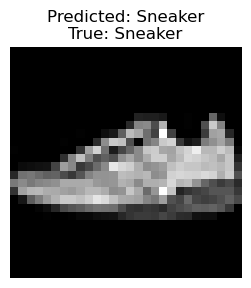


Sample Details:
- Index: 746
- True Label: 7 (Sneaker)
- Prediction: 7 (Sneaker)
- Confidence: 10.98%


In [89]:
import matplotlib.pyplot as plt
import numpy as np

# 定义 FashionMNIST 的类别名称
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 设置模型为评估模式
model.eval()

# 随机选择一个测试样本
random_index = np.random.randint(0, len(test_dataset))
sample_image, sample_label = test_dataset[random_index]

# 添加 batch 维度并移动到 device
image_tensor = sample_image.unsqueeze(0).to(device)

# 预测
with torch.no_grad():
    output = model(image_tensor)
    _, predicted = torch.max(output.data, 1)
    predicted_class = predicted.cpu().item()

# 转换为 numpy 格式并反归一化（假设原图归一化过）
image_np = sample_image.numpy().squeeze()
image_np = (image_np * 0.5) + 0.5  # 缩放回 [0,1] 区间以便可视化

# 可视化图像和预测信息
plt.figure(figsize=(6, 3))
plt.imshow(image_np, cmap='gray')
plt.title(f"Predicted: {class_names[predicted_class]}\nTrue: {class_names[sample_label]}")
plt.axis('off')

# 显示预测置信度
probabilities = torch.nn.functional.softmax(output, dim=1).cpu().numpy()[0]
confidence = np.max(probabilities) * 100
plt.show()

# 输出详细信息
print("\nSample Details:")
print(f"- Index: {random_index}")
print(f"- True Label: {sample_label} ({class_names[sample_label]})")
print(f"- Prediction: {predicted_class} ({class_names[predicted_class]})")
print(f"- Confidence: {confidence:.2f}%")
